# Scrapping Exercises - Part 2 - 1

Using the selectors from the previous part, we created a spider which get all the information from polytechnique actu page.
We suggest you to run it through this notebook and to have a look to the produced data.

Your next challenge will be to write your own spider.

## 1. Making imports 

In [1]:
# Imports
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn display
sns.set()

## 2. Running the spider

(The process might take over one minute if you remove the __"-a nb_article_max=100"__ to get all the articles)

In [5]:
# Parameters for spider execution
file_path = '../scrapped_data/'
file_name = 'actuX_basic_nbk_data.jl'
spider_name = 'actuX_basic'
path = file_path + file_name

# Check if file already exists
if file_name in os.listdir(file_path):
    _ = os.remove(path)

# Execution of spider
cmd1 = 'cd ../TA_scrapy/'
cmd2 = 'scrapy crawl {} -o {} -a nb_article_max=100'.format(spider_name, path)
cmd = cmd1 + ' && ' + cmd2
_ = os.system(cmd)

if _==0:
    print("Scrapping finished.")
else:
    print('Look at the bash to understand error.')

Scrapping finished.


## 3. Reading scrapped data

In [6]:
# Function rto read jl file
def read_jl_file(file_name):
    values = []
    with open(file_name, 'rb') as f:
        line = '---'
        while len(line)>1:
            line = f.readline()
            values.append(line)
    values = values[:-1]
    values = [json.loads(i) for i in values]
    df = pd.DataFrame(values)
    return df

# Reading file
df = read_jl_file(path)

In [7]:
# Having a brief look at data
print(df.shape)

df.head()

(100, 6)


,content,date_article,lien_article,related_subject,related_subject_links,titre_article
0,L’École polytechnique est le 1er établissement...,30 Janvier 2020,/fr/content/lx-la-plus-internationale-des-univ...,[Classement],[/fr/classement],"L’X, la plus internationale des universités fr..."
1,Les priorités de l’X pour 2020 s’inscrivent da...,28 Janvier 2020,/fr/content/lecole-polytechnique-fixe-ses-prio...,"[Institutionnel, Campus]","[/fr/type/institutionnel, /fr/type/campus]",L’École polytechnique fixe ses priorités pour ...
2,"Le 14 février 2020, l’X célèbre les 35 ans de ...",28 Janvier 2020,/fr/content/lamplification-laser-35-ans-apres-...,"[Recherche, Conference]","[/fr/les-actualites-de-la-recherche, /fr/confe...","L’amplification laser : 35 ans après, des pote..."
3,Deux équipes de trois élèves de l’X sont arriv...,27 Janvier 2020,/fr/content/lx-remporte-pour-la-premiere-fois-...,"[Campus, Prix]","[/fr/type/campus, /fr/prix-et-distinctions]",L’X remporte pour la première fois le concours...
4,Le Département d’économie et la chaire Econoph...,27 Janvier 2020,/fr/content/colloque-la-multidisciplinarite-po...,"[Recherche, Conference, CREST, LADHYX]","[/fr/les-actualites-de-la-recherche, /fr/confe...",Colloque : la multidisciplinarité pour mieux c...


## 4. Having a brief analysis on scrapped data

__Seeing the most frequent mentions__

In [8]:
related_subjects = []
for subjects in df['related_subject'].tolist():
    related_subjects += subjects     
pd.Series(related_subjects).value_counts().head()

Recherche     54
Formation     18
Campus        17
Prix          12
Classement    11
dtype: int64

__Counting the number of publications through times__

In [9]:
def translate_month(x):
    translate_dict = {
        'Janvier':'january',
        'Février':'february',
        'Mars':'march',
        'Avril':'april',
        'Mai':'may',
        'Juin':'june',
        'Juillet':'july',
        'Aout':'august',
        'Septembre':'september',
        'Octobre':'october',
        'Novembre':'november',
        'Décembre':'december'}
    for french, english in translate_dict.items():
        x = x.replace(french, english)
    return x

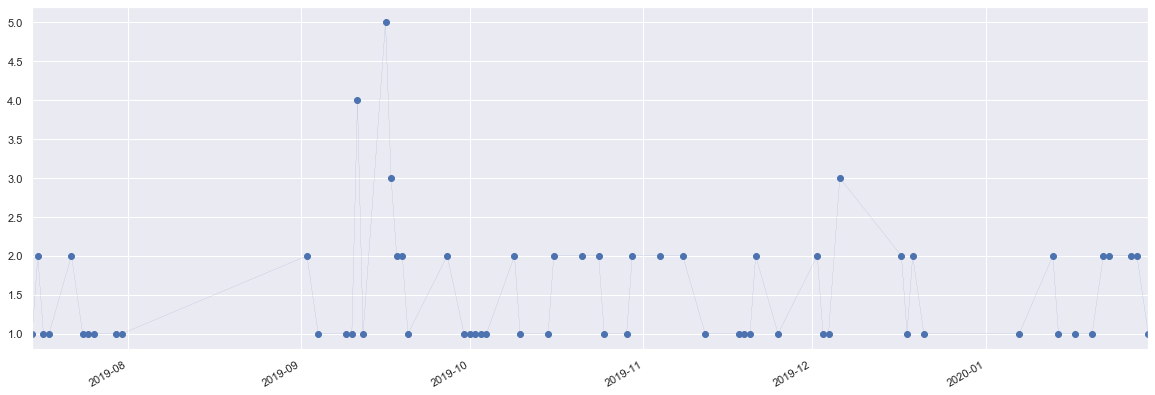

In [10]:
# Transforming French date into English date so that pandas understnds it as a date
df['date'] = df['date_article'].apply(translate_month)

# Preparing for plotting
tmp = pd.to_datetime(df['date'], errors='coerce').value_counts()

# Realizing plotting
_ = plt.figure(figsize=(20,7))
_ = tmp.plot(marker='o', linewidth=0.1)
_ = plt.show()

## From a basic spider to a very useful one

For this very simple example you used a basic spider which gets a short description of eachar article, reading the main article pages.


You can also find a more complex spider which will collect the urls of each article, open them and get all the content of each article. This is closer to what you can do in order to get restaurant's reviews on TripAdvisor.